# Importing Libraries

In [1]:
!pip install imbalanced-learn


In [2]:
import requests
import zipfile
import os
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

# Importing Dataset

In [3]:
url = "https://github.com/mohsley/skin-cancer-detection/raw/refs/heads/main/data.zip"

In [4]:
zip_file_path = "data.zip"
response = requests.get(url)
if response.status_code == 200:
    with open(zip_file_path, "wb") as file:
        file.write(response.content)
    print("ZIP file downloaded successfully.")
else:
    print(f"Failed to download the ZIP file. Status code: {response.status_code}")
    exit()

ZIP file downloaded successfully.


In [5]:
extract_folder = "extracted_data"
os.makedirs(extract_folder, exist_ok=True)
try:
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_folder)
    print("ZIP file extracted successfully.")
except zipfile.BadZipFile:
    print("Error: The downloaded file is not a valid ZIP file.")

ZIP file extracted successfully.


In [6]:
!rm "/content/data.zip"

In [7]:
df = pd.read_csv("/content/extracted_data/data/train-metadata.csv")

<ipython-input-7-f2053e00843a>:1: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/extracted_data/data/train-metadata.csv")


In [8]:
df

,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
0,ISIC_0015670,0,IP_1235828,60.0,male,lower extremity,3.04,TBP tile: close-up,3D: white,20.244422,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,97.517282
1,ISIC_0015845,0,IP_8170065,60.0,male,head/neck,1.10,TBP tile: close-up,3D: white,31.712570,...,IL_6727506,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,3.141455
2,ISIC_0015864,0,IP_6724798,60.0,male,posterior torso,3.40,TBP tile: close-up,3D: XP,22.575830,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.804040
3,ISIC_0015902,0,IP_4111386,65.0,male,anterior torso,3.22,TBP tile: close-up,3D: XP,14.242329,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.989998
4,ISIC_0024200,0,IP_8313778,55.0,male,anterior torso,2.73,TBP tile: close-up,3D: white,24.725520,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,70.442510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401054,ISIC_9999937,0,IP_1140263,70.0,male,anterior torso,6.80,TBP tile: close-up,3D: XP,22.574335,...,IL_9520694,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.999988
401055,ISIC_9999951,0,IP_5678181,60.0,male,posterior torso,3.11,TBP tile: close-up,3D: white,19.977640,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.999820
401056,ISIC_9999960,0,IP_0076153,65.0,female,anterior torso,2.05,TBP tile: close-up,3D: XP,17.332567,...,IL_9852274,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.999416
401057,ISIC_9999964,0,IP_5231513,30.0,female,anterior torso,2.80,TBP tile: close-up,3D: XP,22.288570,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,100.000000


In [9]:
df.columns

Index(['isic_id', 'target', 'patient_id', 'age_approx', 'sex',
       'anatom_site_general', 'clin_size_long_diam_mm', 'image_type',
       'tbp_tile_type', 'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext',
       'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L',
       'tbp_lv_Lext', 'tbp_lv_areaMM2', 'tbp_lv_area_perim_ratio',
       'tbp_lv_color_std_mean', 'tbp_lv_deltaA', 'tbp_lv_deltaB',
       'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm',
       'tbp_lv_eccentricity', 'tbp_lv_location', 'tbp_lv_location_simple',
       'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence', 'tbp_lv_norm_border',
       'tbp_lv_norm_color', 'tbp_lv_perimeterMM',
       'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt',
       'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 'tbp_lv_x', 'tbp_lv_y',
       'tbp_lv_z', 'attribution', 'copyright_license', 'lesion_id',
       'iddx_full', 'iddx_1', 'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5',
       'mel_mitotic_index', '

In [10]:
features_to_drop = [
    # maybe drop these, but they don't make accuracy 1 so idk
    'tbp_lv_Lext',
    'tbp_lv_deltaLB',
    'tbp_lv_location_simple',
    'tbp_lv_norm_color',
    'tbp_lv_perimeterMM',
    'tbp_lv_radial_color_std_max',

    # Clinical measurements
    'mel_thick_mm',
    'mel_mitotic_index',

    # Model confidence scores
    'tbp_lv_dnn_lesion_confidence',
    'tbp_lv_nevi_confidence',

    # IDs and metadata (not relevant for prediction)
    'iddx_full',
    'iddx_1',
    'iddx_2',
    'iddx_3',
    'iddx_4',
    'iddx_5',
    'isic_id',
    'patient_id',
    'lesion_id',
    'attribution',
    'copyright_license'
]

In [11]:
df.drop(columns=features_to_drop,inplace=True)

In [12]:
df.head()

,target,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,...,tbp_lv_location,tbp_lv_minorAxisMM,tbp_lv_norm_border,tbp_lv_stdL,tbp_lv_stdLExt,tbp_lv_symm_2axis,tbp_lv_symm_2axis_angle,tbp_lv_x,tbp_lv_y,tbp_lv_z
0,0,60.0,male,lower extremity,3.04,TBP tile: close-up,3D: white,20.244422,16.261975,26.922447,...,Right Leg - Upper,1.543016,7.091360,2.036195,2.637780,0.590476,85,-182.703552,613.493652,-42.427948
1,0,60.0,male,head/neck,1.10,TBP tile: close-up,3D: white,31.712570,25.364740,26.331000,...,Head & Neck,0.821918,2.116402,0.853227,3.912844,0.285714,55,-0.078308,1575.687000,57.174500
2,0,60.0,male,posterior torso,3.40,TBP tile: close-up,3D: XP,22.575830,17.128170,37.970460,...,Torso Back Top Third,1.194905,4.798335,1.743651,1.950777,0.361905,105,123.649700,1472.010000,232.908900
3,0,65.0,male,anterior torso,3.22,TBP tile: close-up,3D: XP,14.242329,12.164757,21.448144,...,Torso Front Top Half,2.481328,1.975874,1.258541,1.573733,0.209581,130,-141.024780,1442.185791,58.359802
4,0,55.0,male,anterior torso,2.73,TBP tile: close-up,3D: white,24.725520,20.057470,26.464900,...,Torso Front Top Half,0.929916,3.658854,2.085409,2.480509,0.313433,20,-72.315640,1488.720000,21.428960


In [13]:
missing_percentages = (df.isnull().sum() / len(df)) * 100
columns_to_keep = missing_percentages[missing_percentages < 50].index
skin_cancer_df= df[columns_to_keep]
skin_cancer_df = skin_cancer_df.fillna(skin_cancer_df.mode().iloc[0])
skin_cancer_df.shape

(401059, 34)

In [14]:
skin_cancer_df.columns

Index(['target', 'age_approx', 'sex', 'anatom_site_general',
       'clin_size_long_diam_mm', 'image_type', 'tbp_tile_type', 'tbp_lv_A',
       'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext', 'tbp_lv_C', 'tbp_lv_Cext',
       'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L', 'tbp_lv_areaMM2',
       'tbp_lv_area_perim_ratio', 'tbp_lv_color_std_mean', 'tbp_lv_deltaA',
       'tbp_lv_deltaB', 'tbp_lv_deltaL', 'tbp_lv_deltaLBnorm',
       'tbp_lv_eccentricity', 'tbp_lv_location', 'tbp_lv_minorAxisMM',
       'tbp_lv_norm_border', 'tbp_lv_stdL', 'tbp_lv_stdLExt',
       'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 'tbp_lv_x', 'tbp_lv_y',
       'tbp_lv_z'],
      dtype='object')

In [15]:
skin_cancer_df.head()

,target,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,...,tbp_lv_location,tbp_lv_minorAxisMM,tbp_lv_norm_border,tbp_lv_stdL,tbp_lv_stdLExt,tbp_lv_symm_2axis,tbp_lv_symm_2axis_angle,tbp_lv_x,tbp_lv_y,tbp_lv_z
0,0,60.0,male,lower extremity,3.04,TBP tile: close-up,3D: white,20.244422,16.261975,26.922447,...,Right Leg - Upper,1.543016,7.091360,2.036195,2.637780,0.590476,85,-182.703552,613.493652,-42.427948
1,0,60.0,male,head/neck,1.10,TBP tile: close-up,3D: white,31.712570,25.364740,26.331000,...,Head & Neck,0.821918,2.116402,0.853227,3.912844,0.285714,55,-0.078308,1575.687000,57.174500
2,0,60.0,male,posterior torso,3.40,TBP tile: close-up,3D: XP,22.575830,17.128170,37.970460,...,Torso Back Top Third,1.194905,4.798335,1.743651,1.950777,0.361905,105,123.649700,1472.010000,232.908900
3,0,65.0,male,anterior torso,3.22,TBP tile: close-up,3D: XP,14.242329,12.164757,21.448144,...,Torso Front Top Half,2.481328,1.975874,1.258541,1.573733,0.209581,130,-141.024780,1442.185791,58.359802
4,0,55.0,male,anterior torso,2.73,TBP tile: close-up,3D: white,24.725520,20.057470,26.464900,...,Torso Front Top Half,0.929916,3.658854,2.085409,2.480509,0.313433,20,-72.315640,1488.720000,21.428960


In [16]:
numerical_df = skin_cancer_df.select_dtypes(include=["number"])


In [17]:
numerical_df.head()

,target,age_approx,clin_size_long_diam_mm,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,tbp_lv_C,tbp_lv_Cext,tbp_lv_H,...,tbp_lv_eccentricity,tbp_lv_minorAxisMM,tbp_lv_norm_border,tbp_lv_stdL,tbp_lv_stdLExt,tbp_lv_symm_2axis,tbp_lv_symm_2axis_angle,tbp_lv_x,tbp_lv_y,tbp_lv_z
0,0,60.0,3.04,20.244422,16.261975,26.922447,23.954773,33.684638,28.953117,53.058545,...,0.901302,1.543016,7.091360,2.036195,2.637780,0.590476,85,-182.703552,613.493652,-42.427948
1,0,60.0,1.10,31.712570,25.364740,26.331000,24.549290,41.219030,35.299260,39.702910,...,0.639885,0.821918,2.116402,0.853227,3.912844,0.285714,55,-0.078308,1575.687000,57.174500
2,0,60.0,3.40,22.575830,17.128170,37.970460,33.485410,44.174920,37.611800,59.265850,...,0.932147,1.194905,4.798335,1.743651,1.950777,0.361905,105,123.649700,1472.010000,232.908900
3,0,65.0,3.22,14.242329,12.164757,21.448144,21.121356,25.746200,24.374023,56.414429,...,0.654458,2.481328,1.975874,1.258541,1.573733,0.209581,130,-141.024780,1442.185791,58.359802
4,0,55.0,2.73,24.725520,20.057470,26.464900,25.710460,36.217980,32.608740,46.946070,...,0.946448,0.929916,3.658854,2.085409,2.480509,0.313433,20,-72.315640,1488.720000,21.428960


In [18]:
numerical_df.shape

(401059, 29)

In [19]:
X = numerical_df.drop('target', axis=1)
y = numerical_df['target']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#SMOTE

In [22]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [23]:
print("Before SMOTE:")
print(y_train.value_counts())
print("After SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

Before SMOTE:
target
0    360600
1       353
Name: count, dtype: int64
After SMOTE:
target
0    360600
1    360600
Name: count, dtype: int64


In [24]:
column_names = [f'feature_{i}' for i in range(X_train_resampled.shape[1])]  # Generate generic column names

# Convert X_train_resampled and y_train_resampled to DataFrame and Series
oversampled_data = pd.concat([
    pd.DataFrame(X_train_resampled, columns=column_names),  # Use generated column names
    pd.Series(y_train_resampled, name='target')             # Assign 'target' name to y
], axis=1)
# Sample 100,000 rows per class and combine
final_data = (oversampled_data.groupby('target')
                            .apply(lambda x: x.sample(n=100000, random_state=42))
                            .reset_index(drop=True)
                            .sample(frac=1, random_state=42))  # Shuffle data

# Split into features and target
X_final = final_data.drop(columns='target')
y_final = final_data['target']

# Verify the distribution
print("Final class distribution:")
print(y_final.value_counts())

Final class distribution:
target
1    100000
0    100000
Name: count, dtype: int64


<ipython-input-24-7a12fc845ce6>:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=100000, random_state=42))


# KNN

In [25]:
k = 2
knn = KNeighborsClassifier(n_neighbors=k)

In [26]:
knn.fit(X_final, y_final)

KNeighborsClassifier(n_neighbors=2)

In [27]:
y_pred = knn.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [28]:
accuracy = accuracy_score(y_test, y_pred)

In [29]:
print(accuracy)

0.9879818481025283


# AUC ROC

In [30]:
y_proba = knn.predict_proba(X_test)[:, 1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


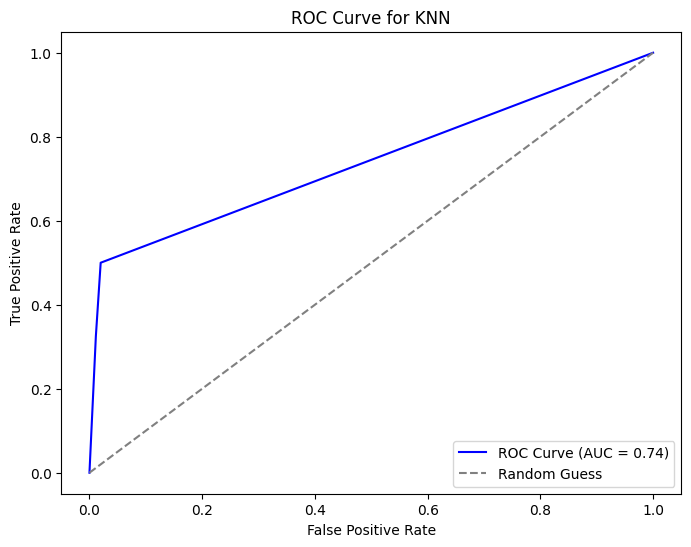

In [31]:

fpr, tpr, thresholds = roc_curve(y_test, y_proba)  # `y_test` is now binary
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for KNN")
plt.legend(loc="lower right")
plt.show()

In [32]:
print(f"Area Under Curve (AUC): {roc_auc:.2f}")

Area Under Curve (AUC): 0.74
